<a href="https://colab.research.google.com/github/kwpark23/Airline-Delays/blob/main/Airline_delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Introduction

In the past summer, extreme traveller volumes and under-prepared by airlines and airport caused one of worst travelling experience in recent years. Hundreds of flights were cancelled that left thousands of travellers stranded in the airport. Toronto Pearson airport was ranked the worst airport in North America for flight dalays and cancellations (source: https://www.cnn.com/travel/article/worst-airports-delays-cancellations-summer-2022/index.html). Airlines like Air Canada lost millions of dollars for having to reschedule flights or rebook flights altogether for customers (source: https://www.theglobeandmail.com/business/article-air-canada-earnings-second-quarter-results/). Customers also lost a lot of money for having their plan derailed. 

If we are to avoid this type of problem in the future, what can we do? We can use the predictive power of machine learning algorithms to help predict whether a flight would be delayed. We can use the past data of flights that have been delayed and not delayed to train our Machine Learning model. 

Airlines and airports can benefit from such Machine Learning model and schedule flights accordingly to avoid possible dalays in the future. Travellers won't have to worry whether their flight might get delayed or not.  


* **Dataset Used:** Airline delay dataset
* **Description of the dataset:** Using Airline delay dataset (includes Air Canada) to determine if a flight is likely to be delayed (This problem affected a lot of Canadians this summer). 
* **Business Problem:** Using Machine Learning (Binary Classification), can airlines predict which flight is likely to be delayed, and therefore reroute schedules ahead to avoid bottlenecks at the airports? 

# 2.0 Basic Installation
In this section, we install pycaret and the Kaggle dataset.  

We will show:

* **Setting Up Modules:** How to install pycaret, kaggle and other required modules
* **Getting Data:**  How to import data from Kaggle website directly




1. First we will be installing Pycaret for ML data processing. 

In [ ]:
!pip install pycaret

2. Next, we will be installing Kaggle module and make a separate directory called kaggle (if the directory already exists, *mkdir* command won't do anything). 

In [ ]:

! pip install kaggle

We need to create a directory inside ./root (current directory) called .kaggle

In [ ]:
mkdir ~/.kaggle

### Important!! Following this instruction: https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/

### We need to download our API token to our desktop PC (or notebook). Then simply upload kaggle.jason to this notebook. 


In [ ]:
cp kaggle.json ~/.kaggle/

3. To download kaggle dataset directly from Kaggle website, we need to have API Credential from the Kaggle account holder. I have used my API Credential for this project. I have already downloaded the credential and stored it inside /MyDrive/. 

Each time this Colab notebook runs, it will grab the credential from the directory, so we can fetch the dataset. 

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

4. Now, we are ready to fetch the dataset from the website and unzip it. 

In [ ]:
! kaggle datasets download jimschacko/airlines-dataset-to-predict-a-delay --force

In [ ]:
! unzip airlines-dataset-to-predict-a-delay.zip

## Note about the dataset: This dataset is from 2008, so some airlines have since been out of business or have been merged with other airlines

In [ ]:
! pip install pandas


# 3.0 Data Analysis

### Panda Profiling

5. We are now going to use pandas profiling function to generate a profile report on our dataset for data visualization and analysis

Based on Pandas analysis we can deduce following details about our dataset:

1. Dataset has no missing data or duplicate rows
2. Time column is the departure time measured in minutes from midnight 
3. Length column is the duration of the flight in minutes 
4. Flight and Length shows negative correlation
5. Time and Delay shows positive correlation (What we are interested in)
6. Airline and Length shows positive correlation


In [ ]:
import pandas as pd
import pandas_profiling as pp 


dataset = pd.read_csv('/content/Airlines.csv')
profile = pp.ProfileReport(dataset) 
profile.to_file("output.html")
profile

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns; sns.set_theme()

5. Once the dataset has been read, check the shape of the dataset upsing Pycaret's *shape* command 

### Individual Feature Exploration




In [ ]:
dataset.shape

(539383, 9)

We can see that there are over half a million data with nine features for this dataset

#### Airlines

There is 18 unique airline companies.


count       18.000000
mean     29965.722222
std      22026.299042
min       5578.000000
25%      14821.750000
50%      24368.500000
75%      36078.750000
max      94097.000000
Name: id, dtype: float64

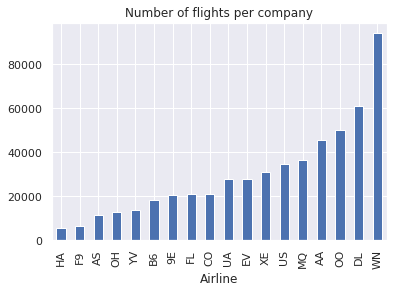

In [ ]:
#how many unique values in 'Airline': 18
Airlines = dataset.groupby('Airline')['id'].nunique()
Airlines_count = Airlines.count()
Airlines = Airlines.sort_values()

print("There is " + Airlines_count.astype(str) +  " unique airline companies.")

ax_c = Airlines.plot.bar()
ax_c.set_title('Number of flights per company')

Airlines.describe()

Text(0, 0.5, '%')

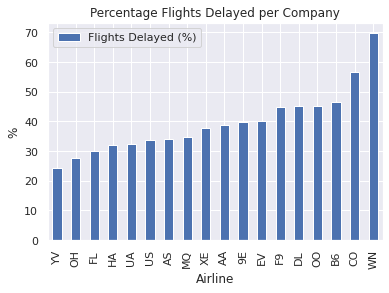

In [ ]:
df_a = dataset
df_a_delay = Airlines = dataset.groupby('Airline')['Delay'].mean()
df_a_delay = df_a_delay.reset_index()
df_a_delay['Flights Delayed (%)'] = (df_a_delay['Delay'] *100).round(2)
df_a_delay = df_a_delay.sort_values('Delay')
df_a_delay = df_a_delay.drop(columns= 'Delay')

df_a_delay.plot(kind = 'bar', x = 'Airline', title="Percentage Flights Delayed per Company")
plt.ylabel("%")

As we can see from Airlines analysis, Southwest Airline (WN) has the highest number of flights, as well as highest percentage of flight delays.

#### Time (of departure in minutes)

Text(0.5, 1.0, 'Flights per Hour of Day')

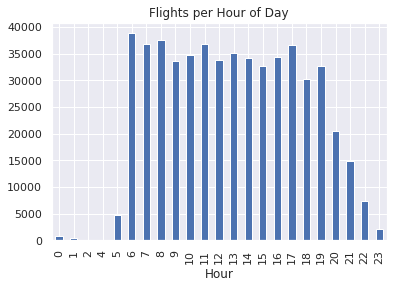

In [ ]:
df_time = dataset
df_time['Hour_full'] = df_time['Time']/60
df_time['Hour'] = df_time['Hour_full'].astype(int)
df_time['Minutes'] = (df_time['Hour_full'] - (df_time['Hour'] ) )*60

HourOfDay = df_time.groupby('Hour')['id'].nunique()
HourOfDay.describe()

HourDay = dataset.groupby('Hour')['id'].nunique()

ax_h = HourDay.plot.bar()
ax_h.set_title('Flights per Hour of Day')

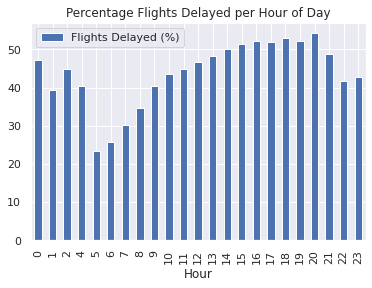

In [ ]:
df_time1 = dataset
df_time1['Hour_full'] = df_time1['Time']/60
df_time1['Hour'] = df_time1['Hour_full'].astype(int)


df_h_delay = Airlines = df_time1.groupby('Hour')['Delay'].mean()
df_h_delay = df_h_delay.reset_index()

df_h_delay['Flights Delayed (%)'] = (df_h_delay['Delay'] *100).round(2)
df_h_delay = df_h_delay.drop(columns= 'Delay')
df_h_delay.plot.bar(x = 'Hour', title="Percentage Flights Delayed per Hour of Day" )

Here, we can see that most flight leave between 6AM and 7PM (19th hour). Also most delays occur on all time slots except for between 5AM and 8AM. 

#### Length of the Flight

Text(0.5, 1.0, 'Delay Probability per Length of Flight (Hours)')

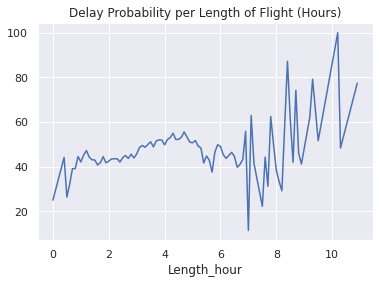

In [ ]:
df_time_l = dataset
df_time_l['Length_hour'] = df_time_l['Length']/60
df_time_l['Length_hour'] = df_time_l['Length_hour'].round(1)

df_l_delay = df_time_l.groupby('Length_hour')['Delay'].mean()
df_l_delay = df_l_delay * 100
ax_l = df_l_delay.plot()
ax_l.set_title('Delay Probability per Length of Flight (Hours)')

In [ ]:
#'Delay'
delay_pct = round(df_time['Delay'].sum()/df_time['Delay'].count() * 100 , 2)
delay_pct_w = delay_pct.astype(str)
print(delay_pct_w +  '% of flights is delayed')

44.54% of flights is delayed


Here, we can see that for longer flights, it is more likely that delay will occur, with some flights over 10 hours of flight reaching 100% chance of delay. Overall, 44.54% of all flights were delayed in our dataset. 

#### Exploring data correlation

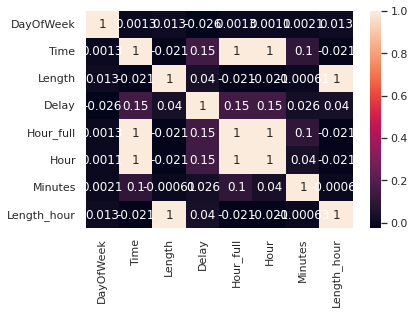

In [ ]:
df_mat = dataset.drop(['id', 'Flight'], axis = 1)
corrMatrix = df_mat.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Here, we can see that for 'delay' column, correlation is highest with: time of day, length of the flight (not much), and Day Of Week (even less) 

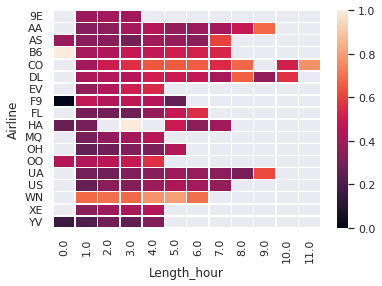

In [ ]:
df_time_l = dataset
df_time_l['Length_hour'] = df_time_l['Length']/60
df_time_l['Length_hour'] = df_time_l['Length_hour'].round(0)

table_l = pd.pivot_table(df_time_l, values = 'Delay',  index=['Airline'], columns=['Length_hour'], aggfunc=np.mean)
ax = sns.heatmap(table_l, linewidths=.5)

Here, for airlines with longer flights, delay might be more likely. 

### Data split


6. Good Work! Now we have a working dataset for our ML training. Finally, make sure to set aside validation and test dataset to be used after ML training is done. 

In [ ]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (512414, 13)
Unseen Data For Predictions: (26969, 13)


# 4.0 Setting up Environment in PyCaret

* **Setting Up our dataset pipeline:** We will be using `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.

In [ ]:
! pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.classification import *

1. We are going to set up our ML environment and customize it by pre-processing pipeline using different parameteres.  

In [ ]:
exp_clf101 = setup(data = data, target = 'Delay', session_id=123,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  log_experiment = False, experiment_name = 'airlinedelays', use_gpu=True) 

,Description,Value
0,session_id,123
1,Target,Delay
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(512414, 13)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Delay',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='Delay')),
                ('fix_perfect', Remove_100(target='Delay')),
                ('clean_names', Clean_Colum_Names()),
       

A few important things to note regarding the dataset:
- **Target Type :**  Target type for this dataset is binary (1 or 0)<br/>
<br/>
- **Original Data :**  Displays the original shape of the dataset. In this experiment (512414, 9) means 512414 samples and 9 features including the target column. <br/>
<br/>


# 5.0 Comparing All Models

Candidates for our model are as follows:

1. Random Forest ('rf')
Pro: robust to outliers, works well with non-linear data, lower risk of overfitting, runs well with large dataset, better accuracy than other classification algorithms
Con: found to be biased with dealing with categorical variables, slow training

2. Logistic regression ('lr')
Pro:fast at clasifying unkown records, good accuracy for many simple data sets
Con: assumes linearity between dependent variables and independent variables, non-linear problems can't be solved with logistic regression, Neural Network can outperform this algorithm

3. Linear Discriminant Analysis ('lda')
Pro: Could be better alternative to logistic regression, simple and fast
Con: requires normal distribution assumption on features

4. Ada Boost Classifier ('ada')
Pro: requires less parameter tweaking than SVM, no overfitting, improved accuracy
Con: sensitive to noises

In [ ]:
best_model = compare_models(include = ['ada', 'rf', 'lda', 'lr'], fold=2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6756,0.7333,0.5685,0.6559,0.6091,0.3342,0.3367,225.10
ada,Ada Boost Classifier,0.6587,0.7120,0.5375,0.6380,0.5834,0.2979,0.3011,62.96
lr,Logistic Regression,0.6550,0.7058,0.5181,0.6380,0.5718,0.2881,0.2925,98.52
lda,Linear Discriminant Analysis,0.6547,0.7054,0.5129,0.6392,0.5691,0.2868,0.2916,41.56


INFO:logs:create_model_container: 4
INFO:logs:master_model_container: 4
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
print(best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


Based on the result, it seems that Random Forest Classifier has the best accuracy. 

# 6.0 Ensembling Models
Ensemble methods are techniques that create multiple models and then combine them to produce improved results. Ensemble methods usually produces more accurate solutions than a single model would. We are going to try a number of different techniques to find the model with highest accuracy. 

### Bagging and boosting
Bagging is used with decision trees, where it significantly raises the stability of models in improving accuracy and reducing variance, which eliminates the challenge of overfitting.

Boosting combines a set of weak learners into a strong learner to minimize training errors. In boosting, a random sample of data is selected, fitted with a model and then trained sequentially — that is, each model tries to compensate for the weaknesses of its predecessor. With each iteration, the weak rules from each individual classifier are combined to form one, strong prediction rule. 

In [ ]:
dt = create_model('dt', fold=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6236,0.6186,0.5731,0.5773,0.5752,0.2373,0.2373
1,0.6224,0.6178,0.5766,0.5752,0.5759,0.2356,0.2356
Mean,0.6230,0.6182,0.5748,0.5762,0.5755,0.2364,0.2364
Std,0.0006,0.0004,0.0017,0.0011,0.0003,0.0009,0.0009


INFO:logs:create_model_container: 5
INFO:logs:master_model_container: 5
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
bagged_dt = ensemble_model(dt, n_estimators=10, fold=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6690,0.7156,0.5224,0.6618,0.5839,0.3153,0.3214
1,0.6703,0.7174,0.5276,0.6621,0.5872,0.3185,0.3242
Mean,0.6696,0.7165,0.5250,0.6620,0.5856,0.3169,0.3228
Std,0.0006,0.0009,0.0026,0.0002,0.0017,0.0016,0.0014


INFO:logs:create_model_container: 6
INFO:logs:master_model_container: 6
INFO:logs:display_container: 4
INFO:logs:BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                        

In [ ]:
boosted_dt = ensemble_model(dt, method = 'Boosting', fold=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6228,0.6177,0.5721,0.5764,0.5742,0.2356,0.2357
1,0.6228,0.6181,0.5756,0.5758,0.5757,0.2361,0.2361
Mean,0.6228,0.6179,0.5738,0.5761,0.5750,0.2359,0.2359
Std,0.0000,0.0002,0.0017,0.0003,0.0007,0.0002,0.0002


INFO:logs:create_model_container: 7
INFO:logs:master_model_container: 7
INFO:logs:display_container: 5
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction

Between bagging and boosting, it seems that 'bagging' produces better accuracy. 

### Blending

In [ ]:
# train individual models to blend
lightgbm = create_model('lightgbm', verbose = False, fold=2)
dt = create_model('dt', verbose = False, fold=2)
lr = create_model('lr', verbose = False, fold =2)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=lightgbm, fold=2, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, verbose=False, system=True, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Light Gradient Boosting Machine Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=2, random_state=None, shuffle=False), n_jobs=1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:create_model_container: 8
INFO:logs:master_model_contain

In [ ]:
# blend individual models
blend_soft = blend_models(estimator_list = [lightgbm, dt, lr], method = 'soft', fold=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6426,0.7168,0.5762,0.6025,0.5891,0.2731,0.2733
1,0.6418,0.7170,0.5810,0.6004,0.5906,0.2723,0.2725
Mean,0.6422,0.7169,0.5786,0.6015,0.5898,0.2727,0.2729
Std,0.0004,0.0001,0.0024,0.0011,0.0008,0.0004,0.0004


INFO:logs:create_model_container: 11
INFO:logs:master_model_container: 11
INFO:logs:display_container: 9
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=123, reg_alpha=0.0,
                                             reg_lambda=0.0, silent=

Based on comparision between all ensembled models, '' has the highest accuracy, so we will plot our model with ''. All in all, we chose Random Forest Classifier to analysis plots. 

# 7.0 Plotting Models

* **ROC Curve:**
what it is: Receiver Operating Characterstic curve show True Positive Rate (Recall) and False Positive rate

* **AUC:**
what it is: Area under ROC Curve measures 2D area underneath ROC curve from (0,0) to (1,1). AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

* **Precision Recall Curve:**
what it is:The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

* **Feature Importance Plot:**
what it is: provides a list of the most significant variables in descending order

* **Confusion matrix:**
what it is: is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm.Confusion matrices are useful because they give direct comparisons of values like True Positives, False Positives, True Negatives and False Negatives.

In [ ]:
rf = create_model('rf', fold=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6746,0.7328,0.5672,0.6548,0.6079,0.3323,0.3348
1,0.6765,0.7337,0.5697,0.6570,0.6103,0.3361,0.3386
Mean,0.6756,0.7333,0.5685,0.6559,0.6091,0.3342,0.3367
Std,0.0009,0.0005,0.0013,0.0011,0.0012,0.0019,0.0019


INFO:logs:create_model_container: 12
INFO:logs:master_model_container: 12
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


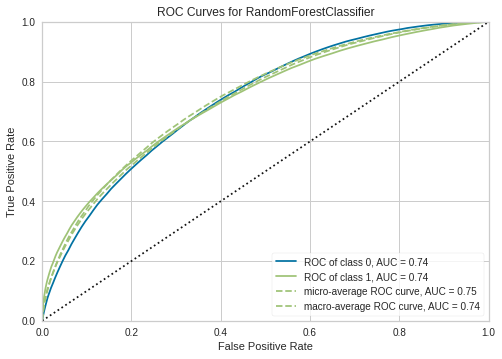

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(rf, plot = 'auc')

AUC Analysis:

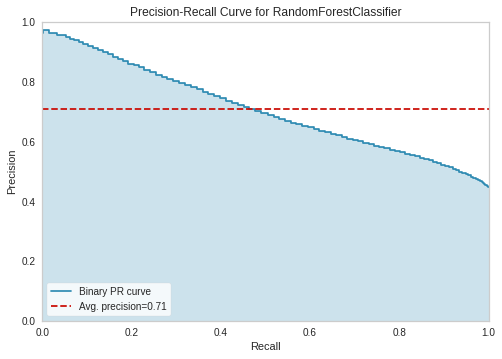

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(rf, plot = 'pr')

Precision-Recall Analysis:


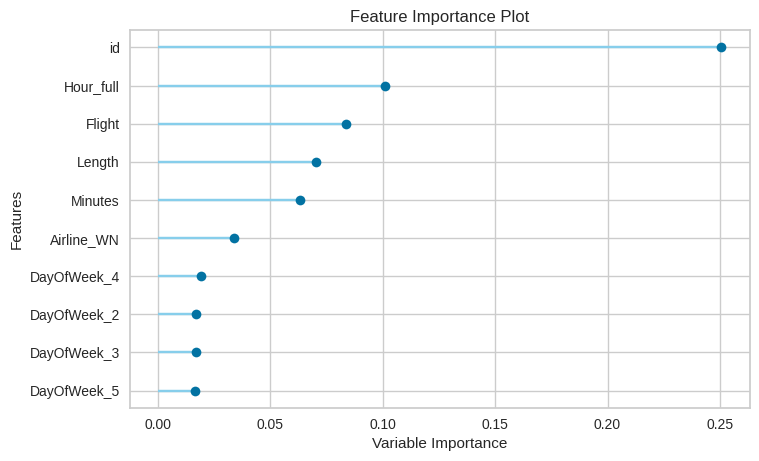

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(rf, plot='feature')

Feature Improtance Analysis:


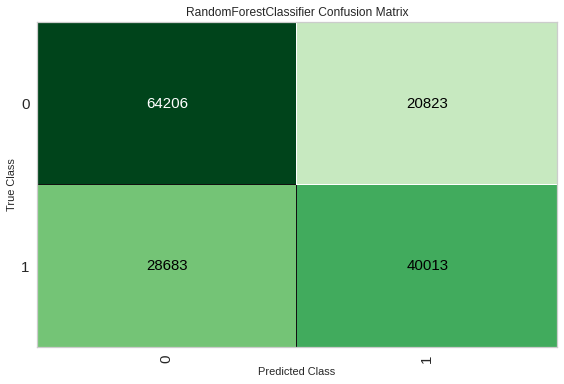

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(rf, plot='confusion_matrix')

Confusion Matrix Analysis:

# Evaluating Our Model

Now we have our final model, we will try unseen dataset on our model and evaluate its prediction accuracy.

In [ ]:
evaluate_model(rf)

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
predict_model(rf)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.678,0.7399,0.5825,0.6577,0.6178,0.3413,0.3432


,id,Flight,Length,Hour_full,Minutes,Length_hour,Airline_9E,Airline_AA,Airline_AS,Airline_B6,...,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Delay,Label,Score
0,1.043443,0.193641,0.704340,-1.665427,1.309648,0.886064,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0.56
1,-1.476886,-1.402037,-2.280328,-0.924873,-1.221346,-1.258660,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.68
2,0.782700,-0.643015,-0.750065,-0.304608,1.418226,-1.258660,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.66
3,0.675620,0.175292,-0.215545,0.051213,0.209063,0.085855,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1.00
4,-0.308163,1.768569,-1.110832,1.322894,0.487231,-1.258660,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153720,-1.110081,0.069950,1.650434,0.512154,0.763151,1.409578,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.59
153721,0.629391,-0.056857,-0.128767,-1.321769,-0.355906,0.085855,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0.64
153722,-0.821765,-0.453433,1.712203,-0.981281,1.309648,1.807603,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0.80
153723,-1.478236,-0.010262,0.339513,-0.962467,1.580698,0.085855,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.80


In [ ]:
final_rf = finalize_model(rf)

In [ ]:
print(final_rf)

In [ ]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

In [ ]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['Delay'], unseen_predictions['Label'], metric = 'Accuracy')

Here, we can see that our model has the accuracy rate of '' on unseen dataset. 

In [ ]:
save_model(final_rf,'Final DT Model 4Oct2022')

# Conclusion

## What we learned from Assignment 1:

## What can be improved for the future assignments: